Unit 4, Lecture 2 Part 2
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feb 4, 2016

Plotting Probability Distributions
====

Let's plot the probability distributions we just learned. First we have to import our tools:

In [1]:
%matplotlib inline
#the line above is for ipython notebooks only - makes plots appear in our notebook
import matplotlib.pyplot as plt #we import a sub-module called pyplot and call it plt for short
import numpy as np #import numpy

Bernoulli Distribution
----

The Bernoulli has a state space of 2, so this would be best suited to a bargraph. Bargraphs are good to use when the state space is **discrete** and small.

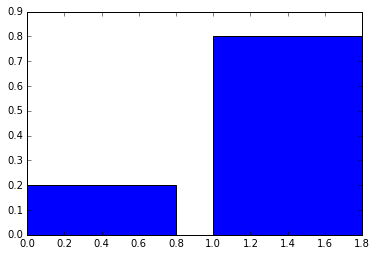

In [2]:
p = 0.8
left_side = [0,1]
height = [1 - p, p]
plt.bar(left_side, height)
plt.show()

The x-axis is a little strange though; the labels don't really make sense. You can set them via a list in fact:

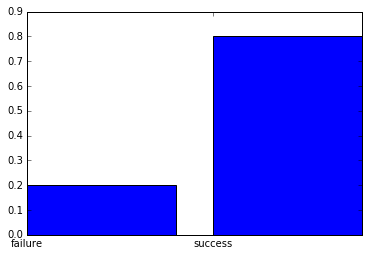

In [3]:
labels = ['failure', 'success']
plt.bar(left_side, height, tick_label=labels)
plt.show()

Notice that we passed in the left edge. We can make python now treat it as the center by setting the alignment:

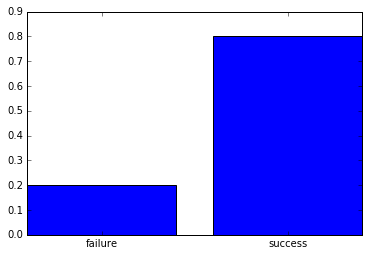

In [4]:
plt.bar(left_side, height, tick_label=labels, align='center')
plt.show()

Better, but that's a very sparse graph. Let's try to use a stlye file to spruce it up.

Styling Graphs
----

Style related functions are in `plt.style`. Let's see what happens

In [5]:
print(plt.style.available)

['seaborn-talk', 'seaborn-notebook', 'classic', 'seaborn-whitegrid', 'presentation', 'ggplot', 'seaborn-white', 'dark_background', 'seaborn-darkgrid', 'bmh', 'seaborn-poster', 'seaborn-dark-palette', 'seaborn-paper', 'fivethirtyeight', 'seaborn-muted', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-deep', 'seaborn-ticks', 'seaborn-bright', 'seaborn-dark', 'grayscale']


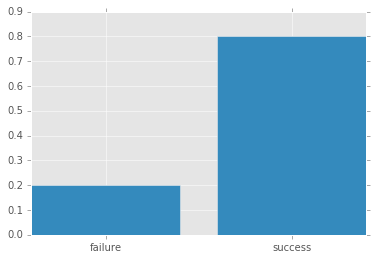

In [7]:
plt.style.use('ggplot')
plt.bar(left_side, height, tick_label=labels, align='center')
plt.show()

That's a little better, but it's too small. We can change that by calling a few `plt` functions

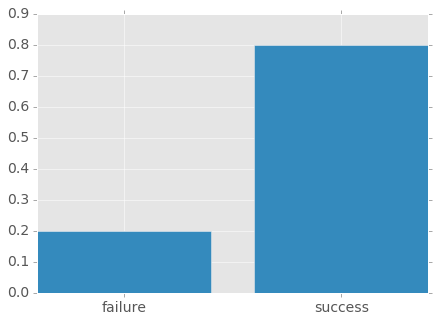

In [53]:
plt.figure(figsize=(7, 5))
plt.bar(left_side, height, tick_label=labels, align='center')
plt.show()

OK, now the figure is a good size. But we'll forget to call that `figure` command each time. How can we always make figures in our notebook that size?

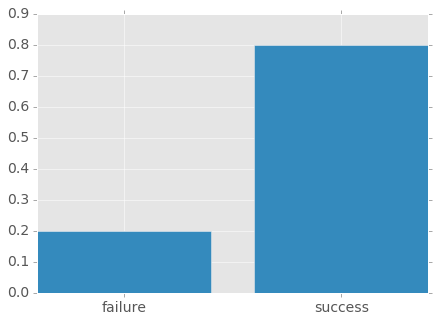

In [52]:
import matplotlib #we need to access matplotlib now, not just plt

matplotlib.rcParams['figure.figsize'] = (7, 5)
plt.bar(left_side, height, tick_label=labels, align='center')
plt.show()

As you can see, there is a dictionary called `rcParams` that stores all this configuration information. Let's try to make our axis labels bigger. Notice that `TAB` autocomplete works with this in notebooks.

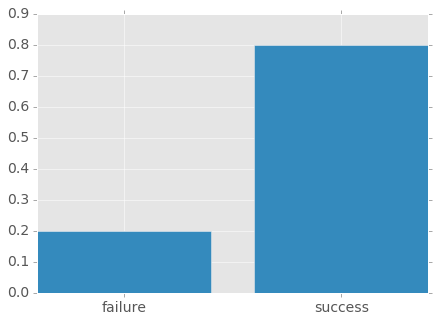

In [54]:
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
plt.bar(left_side, height, tick_label=labels, align='center')
plt.show()

After a while, you'll probably have a set of things you'd like to always have changed. You can save them in a file like this:

In [55]:
%%writefile my_style.mplstyle

figure.figsize: 7, 5
xtick.labelsize: 14
ytick.labelsize: 14

Overwriting my_style.mplstyle


And then you can load it up, in this case on top of the ggplots, like this:

In [17]:
plt.style.use(['ggplot', 'my_style.mplstyle'])

Geometric Distribution
----

The geometric distribution is **discrete** and can go from 1 to $\infty$

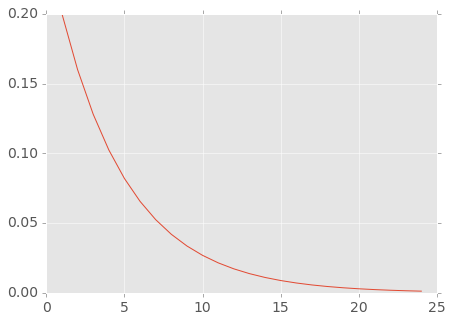

In [56]:
n = np.arange(1, 25)
p = 0.2
pn = (1 - p)**(n - 1) * p

plt.plot(n, pn)
plt.show()

There is a problem with this graph - it appears the the distribution is continuous and it starts at 0. We change this by using matplolib's line styling strings:

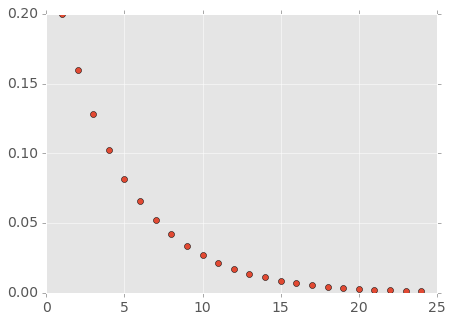

In [57]:
plt.plot(n, pn, 'o')
plt.show()

The 'o' makes it so little os appear. There are other characters as well, like '+'. '-' makes a line. You can mix them too:

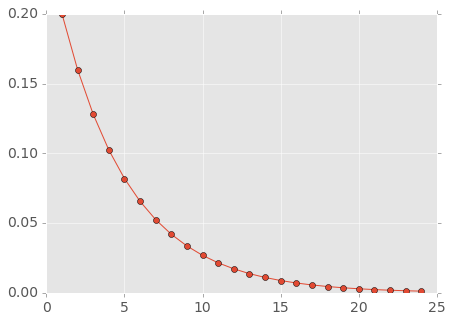

In [58]:
plt.plot(n, pn, '-o')
plt.show()

There are also color codes, which are single letters that go before the marking specifier

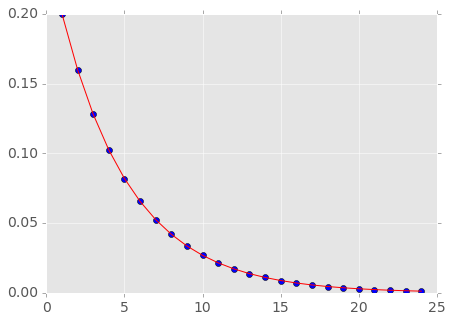

In [59]:
plt.plot(n, pn, 'bo')
plt.plot(n, pn, 'r-')
plt.show()

To adjust the axis limits, use these functions:

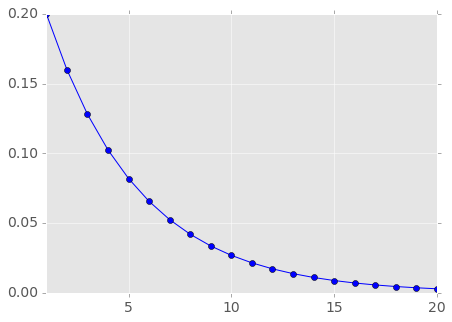

In [60]:
plt.plot(n, pn, 'bo-')
plt.xlim(1, 20)
plt.show()

Binomial Distribution
-----

The binomial distribution is **discrete** and goes from $0$ to $N$. It's the number of successes in $N$ trials.

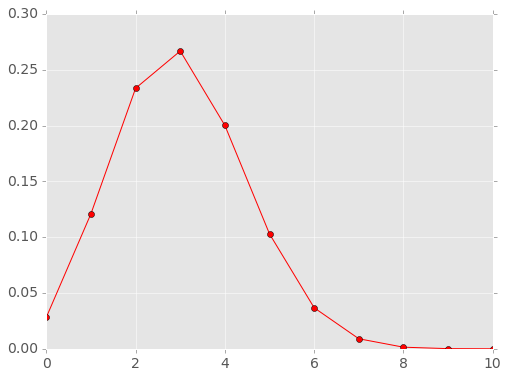

In [34]:
from scipy.misc import comb
N = 10
p = 0.3
n = np.arange(0, N+1)
pn = comb(N, n) * p**n * (1 - p)**(N - n)

plt.plot(n, pn, 'ro-')
plt.show()

Notice that `comb` is a scipy function, so it knows how to deal with arrays. To get the same thing without using arrays, we would have to use a for loop

Poisson Distribution
----

The Poisson distribution is often an approximation to a normal distribution. For example, let's say we're playing the lottery and 650 million people have a ticket. The odds of winning are 1 in 300 million.

$$\mu = Np = \frac{650}{300}$$

The sample space is $0$ to $\infty$ and it is discrete. 

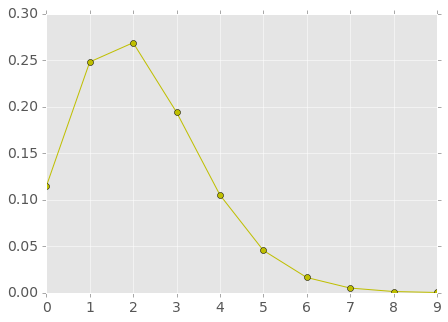

In [61]:
from scipy.misc import factorial
mu = 650 / 300.
n = np.arange(0, 10)
pn = np.exp(-mu) * mu**n / factorial(n)

plt.plot(n, pn, 'yo-')
plt.show()

Further Plotting Details
===



Adding LaTeX
---

As you saw in recitation you may add LaTeX

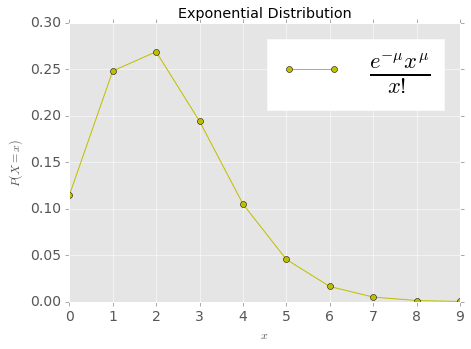

In [64]:
matplotlib.rcParams['legend.fontsize'] = 32
matplotlib.rcParams['legend.facecolor'] = 'white' #make the legend white
plt.plot(n, pn, 'yo-', label=r'$\frac{e^{-\mu}x^\mu}{x!}$')
plt.title('Exponential Distribution')
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')
plt.legend()
plt.show()

You'll notice I have an `r` in front of my string. That's to tell Python to ignore all the funny characters in the string. It means, treat the string literally. Backslashes have a special meaning in Python strings.

Adding Vertical/Horizontal Lines
----

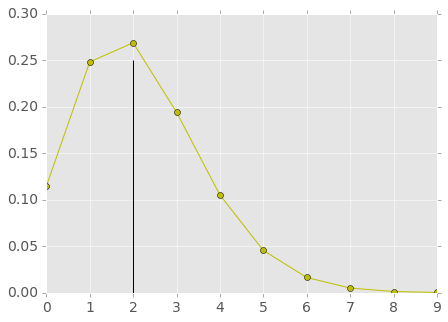

In [65]:
plt.vlines(x=2, ymin=0, ymax=0.25)
plt.plot(n, pn, 'yo-')
plt.show()

Often you just want the line to extend to the top. You can grab the ymin/ymax like this:

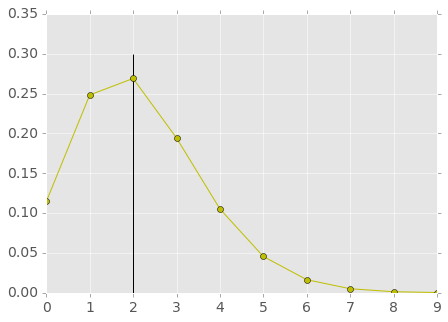

In [66]:
plt.plot(n, pn, 'yo-') #make sure you plot first, so plt knows what the y values will be
ylim = plt.ylim()
plt.vlines(x=2, ymin=ylim[0], ymax=ylim[1])
plt.show()

Uh-oh, matplotlib just made the graph bigger! So we have to tell it again what ylim is

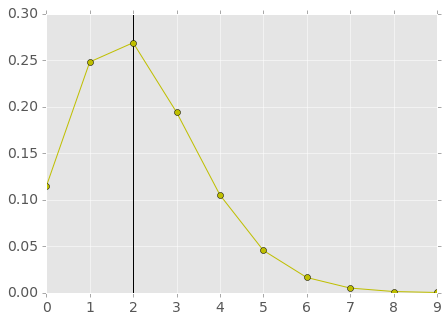

In [67]:
plt.plot(n, pn, 'yo-')
ylim = plt.ylim()
plt.vlines(x=2, ymin=ylim[0], ymax=ylim[1])
plt.ylim(ylim[0], ylim[1])
plt.show()

Finally, there is a trick in Python with lists. If you want to unpack a list when you call a function, you can use an asterisk:

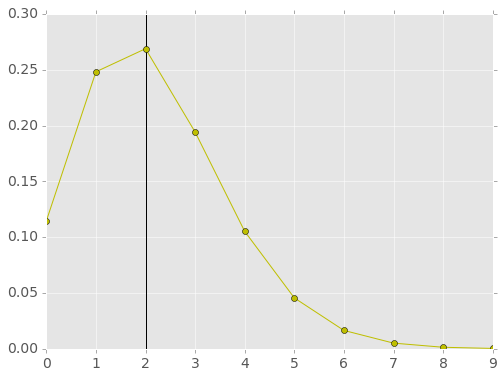

In [51]:
plt.plot(n, pn, 'yo-')
ylim = plt.ylim()
plt.vlines(x=2, ymin=ylim[0], ymax=ylim[1])
plt.ylim(*ylim)
plt.show()

In [ ]:
%system jupyter nbconvert Unit_4_Lecture_2_Part_2.ipynb --to slides --post serve